Implement MSE Without using Numpy

In [3]:
def MSE(y, y_pred):
    mse = sum([(y[i] - y_pred[i])**2 for i in range(len(y))])/len(y)
    return mse

In [12]:
y = [1, 2.5, 5,7,5,8,6, 8,11]
y_pred = [2,4,5,6,7,7,8,9,13]
MSE(y, y_pred)


2.0277777777777777

Implement MSE Using Numpy

In [10]:
import numpy as np
y =np.array([1, 2.5, 5,7,5,8,6, 8,11])
y_pred = np.array([2,4,5,6,7,7,8,9,13])
np.mean(np.square(y - y_pred))

2.0277777777777777

Digit Recognition with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)


60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape


(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

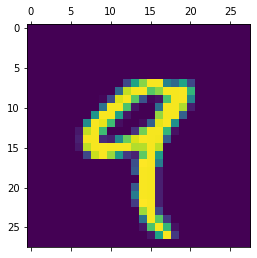

In [7]:
plt.matshow(x_train[4])

In [8]:
y_train[4]

9

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train.shape
x_train = x_train/255
x_test = x_test/255


In [26]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [27]:
x_train_flattened.shape


(60000, 784)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 801us/step - loss: 1.9219 - accuracy: 0.3719
Epoch 2/20
1875/1875 [==============================] - 2s 810us/step - loss: 1.4107 - accuracy: 0.5295
Epoch 3/20
1875/1875 [==============================] - 1s 796us/step - loss: 1.3521 - accuracy: 0.5558
Epoch 4/20
1875/1875 [==============================] - 2s 805us/step - loss: 1.2549 - accuracy: 0.6558
Epoch 5/20
1875/1875 [==============================] - 1s 790us/step - loss: 1.1910 - accuracy: 0.7035
Epoch 6/20
1875/1875 [==============================] - 2s 819us/step - loss: 1.1259 - accuracy: 0.7394
Epoch 7/20
1875/1875 [==============================] - 2s 850us/step - loss: 1.0942 - accuracy: 0.7383
Epoch 8/20
1875/1875 [==============================] - 2s 809us/step - loss: 1.1155 - accuracy: 0.7624
Epoch 9/20
1875/1875 [==============================] - 2s 804us/step - loss: 1.0910 - accuracy: 0.7762
Epoch 10/20
1875/1875 [==============================] - 1s 796u

The accuracy was originally poor because we didn't scale our input values which was dramatically improved after scaling

In [28]:
model.evaluate(x_test_flattened ,y_test)

313/313 [==============================] - 0s 462us/step - loss: 0.6762 - accuracy: 0.8826


[0.6761705279350281, 0.8826000094413757]

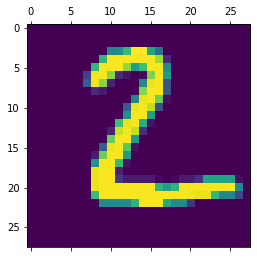

In [33]:
plt.matshow(x_test[1])

In [31]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

array([7.38891959e-03, 1.37631832e-06, 8.38673115e-03, 1.02179825e-01,
       1.86720490e-03, 1.02390349e-02, 1.33309532e-05, 9.58192587e-01,
       3.32638621e-03, 1.41191185e-02], dtype=float32)

In [35]:
np.argmax(y_pred[1])
y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 935,    0,    1,    3,    5,   22,    8,    1,    5,    0],
       [   0, 1053,    3,    2,    0,    5,    3,    1,   68,    0],
       [   7,    7,  902,   11,   26,   17,   14,    8,   39,    1],
       [   1,    1,   28,  901,    6,   48,    1,   13,    8,    3],
       [   0,    2,    4,    0,  954,    1,    3,    1,    4,   13],
       [   5,    4,    6,   35,   20,  796,    8,    3,   11,    4],
       [   7,    3,    8,    2,   29,   34,  872,    0,    3,    0],
       [   1,    7,   28,    0,   17,    0,    0,  954,   11,   10],
       [   3,   14,   12,   20,   38,  148,    5,   19,  712,    3],
       [   6,    8,    3,    9,  152,   23,    0,   61,    0,  747]])>

Text(69.0, 0.5, 'True_label')

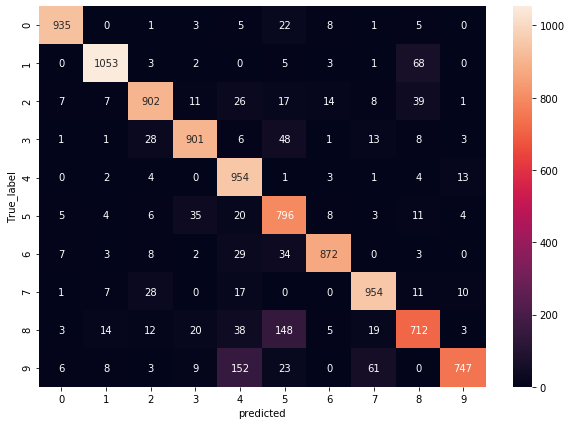

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('True_label')

Can we improve the model by adding a hidden layer?

In [45]:
model = keras.Sequential([
     keras.layers.Dense(150, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)


In [46]:
model.fit(x_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 952us/step - loss: 0.2706 - accuracy: 0.9255
Epoch 2/20
1875/1875 [==============================] - 2s 967us/step - loss: 0.1191 - accuracy: 0.9650
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0828 - accuracy: 0.9753
Epoch 4/20
1875/1875 [==============================] - 2s 959us/step - loss: 0.0629 - accuracy: 0.9811
Epoch 5/20
1875/1875 [==============================] - 2s 916us/step - loss: 0.0486 - accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 2s 937us/step - loss: 0.0398 - accuracy: 0.9877
Epoch 7/20
1875/1875 [==============================] - 2s 996us/step - loss: 0.0304 - accuracy: 0.9909
Epoch 8/20
1875/1875 [==============================] - 2s 940us/step - loss: 0.0243 - accuracy: 0.9924
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 10/20
1875/1875 [==============================] - 2s 991us/st

In [47]:
model.evaluate(x_test_flattened ,y_test)


313/313 [==============================] - 0s 682us/step - loss: 0.0992 - accuracy: 0.9775


[0.0991845428943634, 0.9775000214576721]

In [48]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

array([8.3085119e-12, 1.1820241e-12, 3.2206168e-11, 1.6207940e-07,
       1.5544375e-20, 8.7593662e-16, 1.0331395e-19, 9.4283676e-01,
       1.0193161e-09, 7.6208559e-09], dtype=float32)

In [49]:
np.argmax(y_pred[1])
y_pred_labels = [np.argmax(i) for i in y_pred]


In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)



Text(69.0, 0.5, 'True_label')

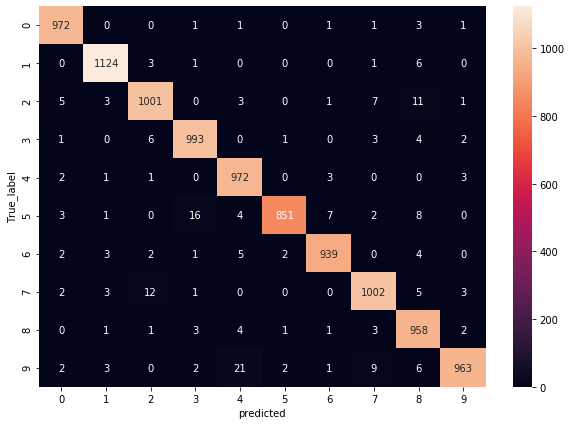

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('True_label')

If we don't want to manually create a flattened array we can use a keras' function

In [53]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.9229
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9635
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0857 - accuracy: 0.9747
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0658 - accuracy: 0.9808
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0498 - accuracy: 0.9846
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0391 - accuracy: 0.9879
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

Popular Activtion functions for Neural networks

In [56]:
# Sigmoid Function
#maps numbers to values between 0 and 1
import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [73]:
sigmoid(10000)

1.0

In [58]:
sigmoid(50)

1.0

In [59]:
sigmoid(48)

1.0

In [69]:
sigmoid(36)

0.9999999999999998

In [76]:
sigmoid(-500)

7.124576406741285e-218

Problem of vanishing gradients for positive and negative numbers since after a particular positive value it out puts 1 and after a particular negative value it can become undefined. eg sigmoid(-1000) gave a math range error